In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)


In [12]:
df = pd.read_csv(r"C:\Users\hp\Downloads\online+retail\ecommerce-sales-analysis-python-main\data\raw\online retail.csv", 
                 encoding='latin1')  # or try 'iso-8859-1' or 'cp1252' if this doesn't work

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
# 1. ابعاد دیتا
print("Shape of dataset:", df.shape)

# 2. اطلاعات کلی ستون‌ها
df.info()

# 3. تعداد مقادیر خالی در هر ستون
df.isnull().sum().sort_values(ascending=False)


Shape of dataset: (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [14]:
# ایجاد ستون Sales
df['Sales'] = df['Quantity'] * df['UnitPrice']

# نمایش چند ردیف اول
df[['InvoiceNo','Quantity','UnitPrice','Sales']].head()


,InvoiceNo,Quantity,UnitPrice,Sales
0,536365,6,2.55,15.30
1,536365,6,3.39,20.34
2,536365,8,2.75,22.00
3,536365,6,3.39,20.34
4,536365,6,3.39,20.34


In [15]:
# تبدیل به datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [16]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')


In [17]:
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales


,YearMonth,Sales
0,2010-12,748957.020
1,2011-01,560000.260
2,2011-02,498062.650
3,2011-03,683267.080
4,2011-04,493207.121
5,2011-05,723333.510
6,2011-06,691123.120
7,2011-07,681300.111
8,2011-08,682680.510
9,2011-09,1019687.622


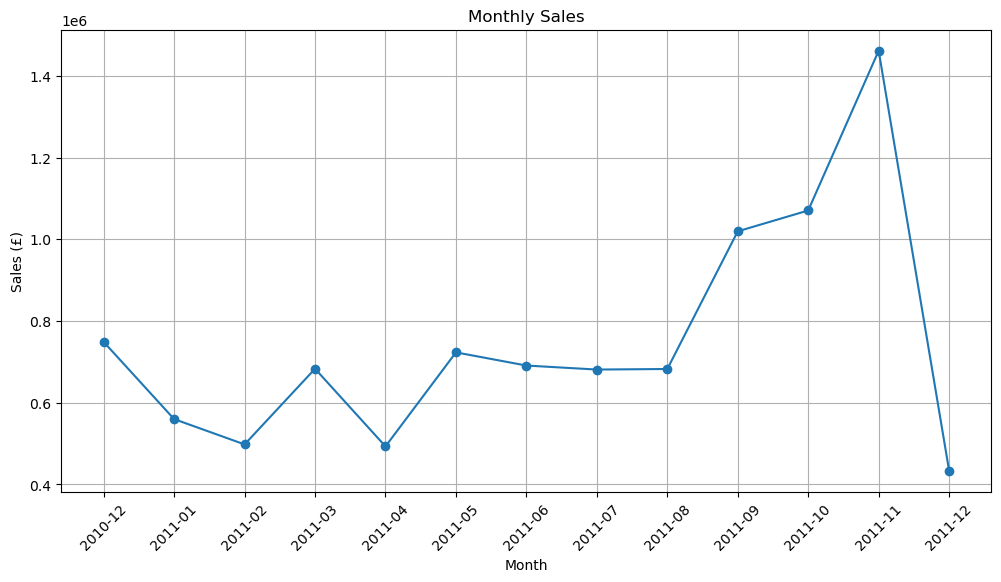

In [18]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Sales'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales (£)')
plt.grid(True)
plt.show()


In [19]:
product_sales = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)
product_sales


Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: Sales, dtype: float64

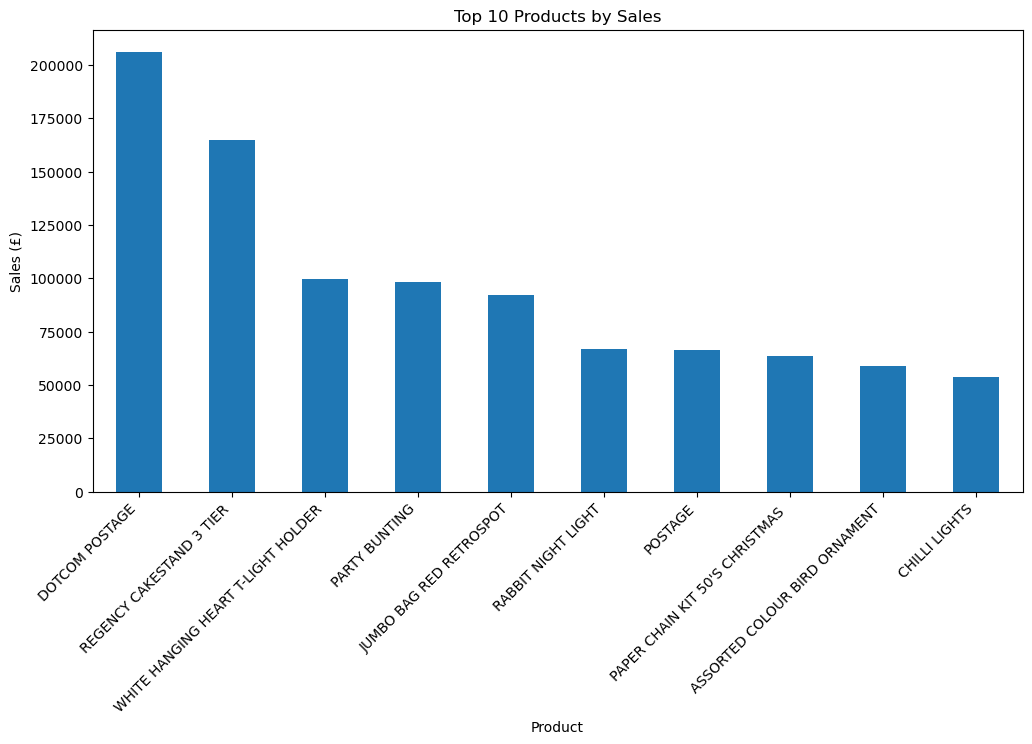

In [20]:
plt.figure(figsize=(12,6))
product_sales.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Products by Sales')
plt.ylabel('Sales (£)')
plt.xlabel('Product')
plt.show()


In [22]:
df_customers = df.dropna(subset=['CustomerID'])


In [23]:
# آخرین تاریخ تراکنش در دیتاست
import datetime as dt
now = df_customers['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df_customers.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                        # Frequency
    'Sales': 'sum'                                 # Monetary
})

rfm.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'Sales':'Monetary'}, inplace=True)
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [24]:
# ۵ مشتری با بیشترین پول خرج کرده
top_customers = rfm.sort_values(by='Monetary', ascending=False).head(5)
top_customers


,Recency,Frequency,Monetary
CustomerID,,,
14646.0,2,77,279489.02
18102.0,1,62,256438.49
17450.0,8,55,187482.17
14911.0,1,248,132572.62
12415.0,24,26,123725.45


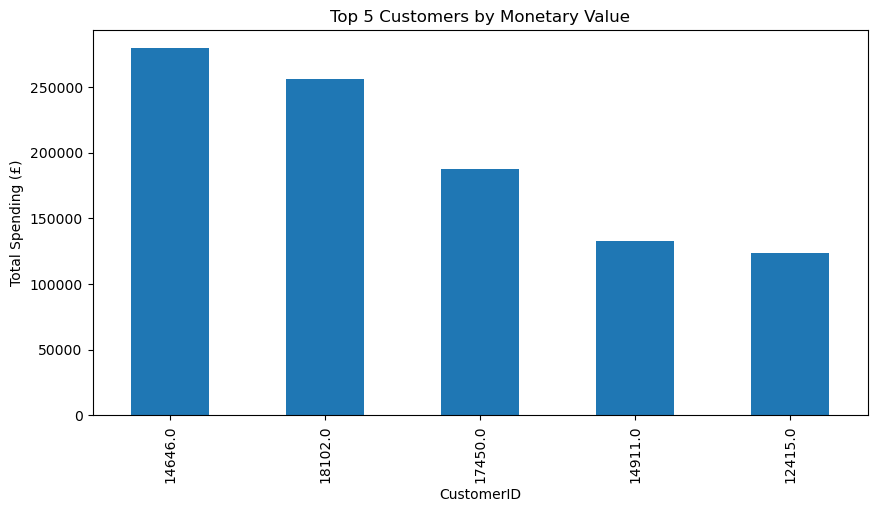

In [25]:
top_customers['Monetary'].plot(kind='bar')
plt.title('Top 5 Customers by Monetary Value')
plt.ylabel('Total Spending (£)')
plt.xlabel('CustomerID')
plt.show()
